# Transforming Data

Bellow is a dummy dataset, that we'll apply PCA to get a better idea how it transforms data.

In [371]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [372]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Text(0,0.5,'feature 2')

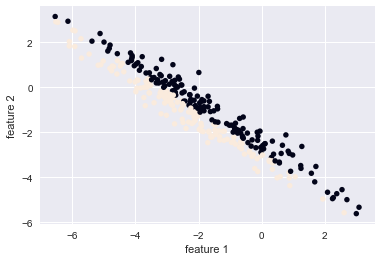

In [373]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

** 1. ** Fit a PCA model to the dataset.

In [374]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_blob)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [375]:
print(pca.components_)

[[ 0.74827666 -0.6633868 ]
 [ 0.6633868   0.74827666]]


In [376]:
print(pca.explained_variance_)

[6.46578116 0.14555253]


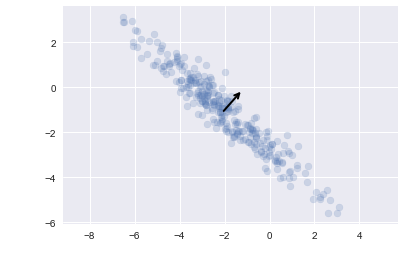

In [377]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_blob[:, 0], X_blob[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

** 2. ** Transfrom the data and plot it.

In [378]:
pca = PCA(n_components=1)
pca.fit(X_blob)
X_pca = pca.transform(X_blob)
print("original shape:   ", X_blob.shape)
print("transformed shape:", X_pca.shape)

original shape:    (300, 2)
transformed shape: (300, 1)


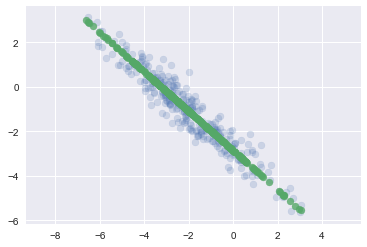

In [379]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_blob[:, 0], X_blob[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Iris

Iris is a classic dataset for PCA. 

In [380]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [381]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_iris
from seaborn import load_dataset
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [382]:
iris = load_dataset('iris')

In [383]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


** 1. ** Apply PCA to the iris dataset

In [384]:
X = iris.iloc[:,:4].values
y = iris.iloc[:,4].values
X.shape

(150, 4)

In [385]:
X = StandardScaler().fit_transform(X)

In [386]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [387]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (150, 4)
transformed shape: (150, 2)


In [388]:
principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

In [389]:
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

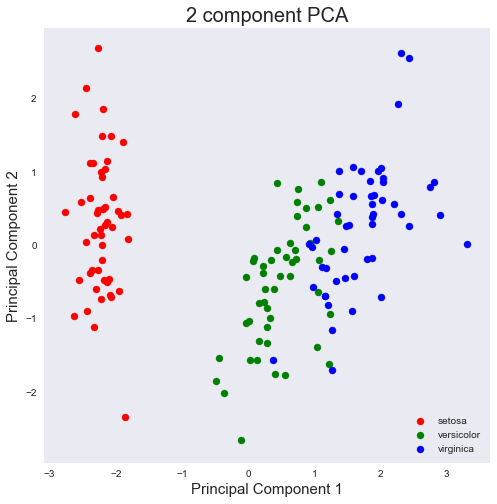

In [390]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [391]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

** 2. ** Make a plot of the explained varriance.

** 3. **  Visualize the iris dataset using the first two principal components, and compare this visualization to using two of the original features.

** 4. ** What does the visulization tell you about the dataset?

# Images

The output from PCA gives us a lower dimensional representation of the dataset that still explains it very we'll. In machine learning we'd say we extracted features from the dataset. In this section we'll apply PCA and then reverse it to reconstruct the  image from these features. If we can reconstruct the image we'll from just the features we extracted this must mean that they are capturing information about the image well.


In [392]:
# https://shankarmsy.github.io/posts/pca-sklearn.html

In [393]:
import matplotlib.image as mpimg

In [394]:
img = mpimg.imread('wild.png')
img.shape # hight, width , channels ( RGB)

(711, 996, 3)

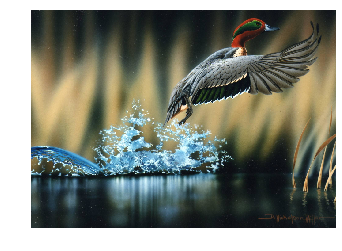

In [395]:
plt.axis('off')
plt.imshow(img)

The image is currently 3D lets reshape into a format that PCA can understand.

In [396]:
h, w, c = img.shape
img_r = np.reshape(img, (711, w * c))
img_r.shape

(711, 2988)

In [397]:
print(h, w, c)

711 996 3


** 1. ** Apply fit a PCA  model onto the image using 64 components. How much variance is explained by the compnents?

In [398]:
pca = PCA(n_components=64)
img_pca = pca.fit_transform(img_r)
print(img_pca.shape)
print(np.sum(pca.explained_variance_ratio_))

(711, 64)
0.96920305


** 2. ** Transfrom the image using the PCA model. What is the shape of the transformed image? 

In [399]:
temp = pca.inverse_transform(img_pca)

print(temp.shape)

(711, 2988)


In [400]:
temp = np.reshape(temp, (711,996,3)) 
print(temp.shape)

(711, 996, 3)


** 3. ** Reverse the transformation, reshape the image back to it orginal shape and then plot the image.

(-0.5, 995.5, 710.5, -0.5)

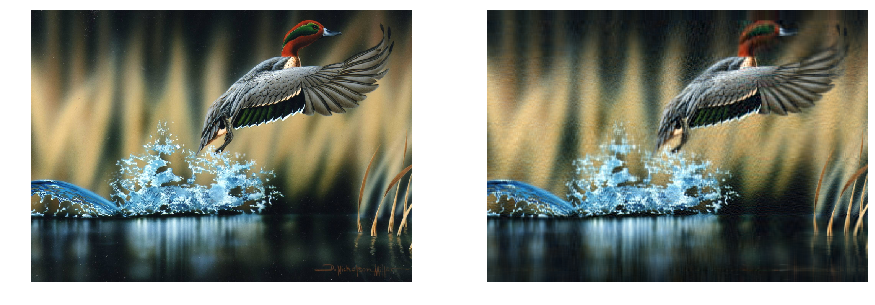

In [403]:
fig, axes = plt.subplots(1,2,figsize=(15,30))
axes[0].imshow(img)
axes[1].imshow(temp.clip(0,1))
axes[0].axis('off')
axes[1].axis('off')